In [1]:
import pandas as pd

collegelocation = pd.read_csv("data/school_location.csv")
collegemajor = pd.read_csv("data/school_major.csv")

merge_collegelocation=pd.merge(collegelocation, collegemajor, on=["name", "id"], how="inner")

merge_collegelocation


,id,name,city,state,main_campus,highest_degree,zipcode,lat,lng,student_count,...,percentage_of_administration_major,percentage_of_sociology_major,percentage_of_trade_major,percentage_of_mechanic_major,percentage_of_production_major,percentage_of_transportation_major,percentage_of_visualart_major,percentage_of_health_major,percentage_of_business_major,percentage_of_history_major
0,100654,Alabama A & M University,Normal,AL,1,4,35762,34.783368,-86.568502,5098.0,...,0.0409,0.0249,0.0,0.0,0.0,0.0,0.0231,0.0000,0.1637,0.0000
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,4,35294-0110,33.505697,-86.799345,13284.0,...,0.0195,0.0239,0.0,0.0,0.0,0.0,0.0249,0.2088,0.2159,0.0141
2,100690,Amridge University,Montgomery,AL,1,4,36117-3553,32.362609,-86.174010,251.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.0000
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,4,35899,34.724557,-86.640449,7358.0,...,0.0000,0.0127,0.0,0.0,0.0,0.0,0.0407,0.1341,0.1930,0.0073
4,100724,Alabama State University,Montgomery,AL,1,4,36104-0271,32.364317,-86.295677,3495.0,...,0.0648,0.0196,0.0,0.0,0.0,0.0,0.0511,0.0904,0.1513,0.0059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,497286,Universal Technical Institute-West Texas,Austin,TX,0,0,78753-9742,30.415828,-97.660482,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5589,497301,Avalon Institute-Las Vegas,Las Vegas,NV,0,0,89102-0046,36.142355,-115.206409,170.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5590,497310,Medspa Academies-National Institute of Modern ...,Las Vegas,NV,0,1,89169-6745,36.117236,-115.158173,97.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5591,497329,American Institute-Cherry Hill,Cherry Hill,NJ,0,0,08002-4309,39.939428,-75.015417,83.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000


In [117]:
"""merge_collegelocation[[
    "percentage_of_agriculture_major",
    "percentage_of_conservation_major",
    "percentage_of_architecture_major",
    "percentage_of_ethniic_major",
    "percentage_of_communication_major",
    "percentage_of_techincalsupport_major",
    "percentage_of_computerscience_major",
    "percentage_of_culinary_major",
    "percentage_of_education_major",
    "percentage_of_engineer_major",
    "percentage_of_engineertech_major",
    "percentage_of_language_major",
    "percentage_of_family_major",
    "percentage_of_legal_major",
    "percentage_of_english_major",
    "percentage_of_humanities_major",
    "percentage_of_science_major",
    "percentage_of_biology_major",
    "percentage_of_math_major",
    "percentage_of_appliedscience_major",
    "percentage_of_interdisciplinary_major",
    "percentage_of_fitness_major",
    "percentage_of_philosophy_major",
    "percentage_of_theology_major",
    "percentage_of_physic_major",
    "percentage_of_sciencetech_major",
    "percentage_of_psychology_major",
    "percentage_of_security_major",
    "percentage_of_administration_major",
    "percentage_of_sociology_major",
    "percentage_of_trade_major",
    "percentage_of_mechanic_major",
    "percentage_of_production_major",
    "percentage_of_transportation_major",
    "percentage_of_visualart_major",
    "percentage_of_health_major",
    "percentage_of_business_major",
    "percentage_of_history_major"
    ]] = merge_collegelocation[[
    "percentage_of_agriculture_major",
    "percentage_of_conservation_major",
    "percentage_of_architecture_major",
    "percentage_of_ethniic_major",
    "percentage_of_communication_major",
    "percentage_of_techincalsupport_major",
    "percentage_of_computerscience_major",
    "percentage_of_culinary_major",
    "percentage_of_education_major",
    "percentage_of_engineer_major",
    "percentage_of_engineertech_major",
    "percentage_of_language_major",
    "percentage_of_family_major",
    "percentage_of_legal_major",
    "percentage_of_english_major",
    "percentage_of_humanities_major",
    "percentage_of_science_major",
    "percentage_of_biology_major",
    "percentage_of_math_major",
    "percentage_of_appliedscience_major",
    "percentage_of_interdisciplinary_major",
    "percentage_of_fitness_major",
    "percentage_of_philosophy_major",
    "percentage_of_theology_major",
    "percentage_of_physic_major",
    "percentage_of_sciencetech_major",
    "percentage_of_psychology_major",
    "percentage_of_security_major",
    "percentage_of_administration_major",
    "percentage_of_sociology_major",
    "percentage_of_trade_major",
    "percentage_of_mechanic_major",
    "percentage_of_production_major",
    "percentage_of_transportation_major",
    "percentage_of_visualart_major",
    "percentage_of_health_major",
    "percentage_of_business_major",
    "percentage_of_history_major"
    ]].multiply(100, axis="index")"""

'merge_collegelocation[[\n    "percentage_of_agriculture_major",\n    "percentage_of_conservation_major",\n    "percentage_of_architecture_major",\n    "percentage_of_ethniic_major",\n    "percentage_of_communication_major",\n    "percentage_of_techincalsupport_major",\n    "percentage_of_computerscience_major",\n    "percentage_of_culinary_major",\n    "percentage_of_education_major",\n    "percentage_of_engineer_major",\n    "percentage_of_engineertech_major",\n    "percentage_of_language_major",\n    "percentage_of_family_major",\n    "percentage_of_legal_major",\n    "percentage_of_english_major",\n    "percentage_of_humanities_major",\n    "percentage_of_science_major",\n    "percentage_of_biology_major",\n    "percentage_of_math_major",\n    "percentage_of_appliedscience_major",\n    "percentage_of_interdisciplinary_major",\n    "percentage_of_fitness_major",\n    "percentage_of_philosophy_major",\n    "percentage_of_theology_major",\n    "percentage_of_physic_major",\n    "perce

In [118]:
testlocation = [col for col in merge_collegelocation.columns if 'percentage' in col]
#print(list(merge_collegelocation.columns))
print(testlocation)


['percentage_of_agriculture_major', 'percentage_of_conservation_major', 'percentage_of_architecture_major', 'percentage_of_ethniic_major', 'percentage_of_communication_major', 'percentage_of_techincalsupport_major', 'percentage_of_computerscience_major', 'percentage_of_culinary_major', 'percentage_of_education_major', 'percentage_of_engineer_major', 'percentage_of_engineertech_major', 'percentage_of_language_major', 'percentage_of_family_major', 'percentage_of_legal_major', 'percentage_of_english_major', 'percentage_of_humanities_major', 'percentage_of_science_major', 'percentage_of_biology_major', 'percentage_of_math_major', 'percentage_of_appliedscience_major', 'percentage_of_interdisciplinary_major', 'percentage_of_fitness_major', 'percentage_of_philosophy_major', 'percentage_of_theology_major', 'percentage_of_physic_major', 'percentage_of_sciencetech_major', 'percentage_of_psychology_major', 'percentage_of_security_major', 'percentage_of_administration_major', 'percentage_of_sociol

In [119]:
merge_collegelocation[testlocation]*100

,percentage_of_agriculture_major,percentage_of_conservation_major,percentage_of_architecture_major,percentage_of_ethniic_major,percentage_of_communication_major,percentage_of_techincalsupport_major,percentage_of_computerscience_major,percentage_of_culinary_major,percentage_of_education_major,percentage_of_engineer_major,...,percentage_of_administration_major,percentage_of_sociology_major,percentage_of_trade_major,percentage_of_mechanic_major,percentage_of_production_major,percentage_of_transportation_major,percentage_of_visualart_major,percentage_of_health_major,percentage_of_business_major,percentage_of_history_major
0,4.45,0.71,0.53,0.0,0.00,2.85,6.58,0.0,3.91,12.10,...,4.09,2.49,0.0,0.0,0.0,0.0,2.31,0.00,16.37,0.00
1,0.00,0.00,0.00,0.2,3.33,0.00,2.29,0.0,6.67,5.59,...,1.95,2.39,0.0,0.0,0.0,0.0,2.49,20.88,21.59,1.41
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,50.00,0.00
3,0.00,0.00,0.00,0.0,1.40,0.00,6.92,0.0,2.18,30.28,...,0.00,1.27,0.0,0.0,0.0,0.0,4.07,13.41,19.30,0.73
4,0.00,0.00,0.00,0.0,9.23,0.00,5.30,0.0,5.89,1.38,...,6.48,1.96,0.0,0.0,0.0,0.0,5.11,9.04,15.13,0.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
5589,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
5590,0.00,0.00,0.00,0.0,0.00,0.00,0.00,100.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
5591,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00


In [2]:
merge_collegelocation

,id,name,city,state,main_campus,highest_degree,zipcode,lat,lng,student_count,...,percentage_of_administration_major,percentage_of_sociology_major,percentage_of_trade_major,percentage_of_mechanic_major,percentage_of_production_major,percentage_of_transportation_major,percentage_of_visualart_major,percentage_of_health_major,percentage_of_business_major,percentage_of_history_major
0,100654,Alabama A & M University,Normal,AL,1,4,35762,34.783368,-86.568502,5098.0,...,0.0409,0.0249,0.0,0.0,0.0,0.0,0.0231,0.0000,0.1637,0.0000
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,4,35294-0110,33.505697,-86.799345,13284.0,...,0.0195,0.0239,0.0,0.0,0.0,0.0,0.0249,0.2088,0.2159,0.0141
2,100690,Amridge University,Montgomery,AL,1,4,36117-3553,32.362609,-86.174010,251.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.0000
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,4,35899,34.724557,-86.640449,7358.0,...,0.0000,0.0127,0.0,0.0,0.0,0.0,0.0407,0.1341,0.1930,0.0073
4,100724,Alabama State University,Montgomery,AL,1,4,36104-0271,32.364317,-86.295677,3495.0,...,0.0648,0.0196,0.0,0.0,0.0,0.0,0.0511,0.0904,0.1513,0.0059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5588,497286,Universal Technical Institute-West Texas,Austin,TX,0,0,78753-9742,30.415828,-97.660482,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5589,497301,Avalon Institute-Las Vegas,Las Vegas,NV,0,0,89102-0046,36.142355,-115.206409,170.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5590,497310,Medspa Academies-National Institute of Modern ...,Las Vegas,NV,0,1,89169-6745,36.117236,-115.158173,97.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
5591,497329,American Institute-Cherry Hill,Cherry Hill,NJ,0,0,08002-4309,39.939428,-75.015417,83.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000


In [4]:
state_count = merge_collegelocation.groupby("state")["name"].count()

count = pd.DataFrame(state_count)
count


,name
state,
AK,9
AL,73
AR,78
AS,1
AZ,94
CA,571
CO,79
CT,63
DC,16


<AxesSubplot:title={'center':'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

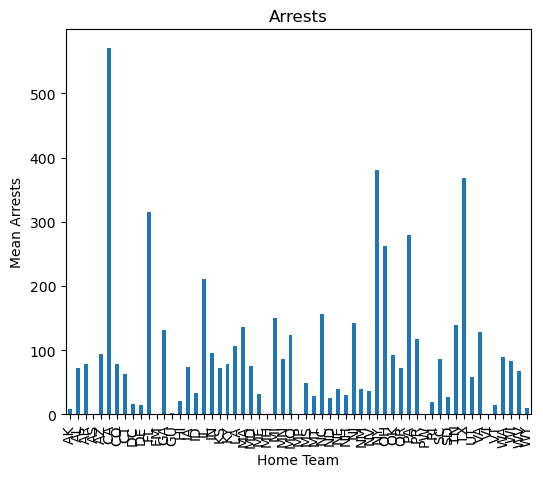

In [7]:
state_count.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(6, 5))
